In [20]:
import pandas as pd, matplotlib.pyplot as plt

In [2]:
images_data = pd.read_csv('images.csv')

In [3]:
images_data.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [5]:
images_data.dtypes

image_id    object
height       int64
width        int64
path        object
dtype: object

Let us filter all non-quadratic shaped images out

In [15]:
images_data[
    images_data['height'] == images_data['width']
]['height'].value_counts()

2560    45005
1000    24945
2000    16154
1500    13813
1200     7518
        ...  
1157        1
1135        1
1269        1
1717        1
1897        1
Name: height, Length: 1572, dtype: int64

Images of size 2560x2560 are the most common. What about both quadratic and rectangular images?

In [17]:
(images_data['height'].astype(str) + 'x' + images_data['width'].astype(str)).value_counts()

2200x1879    92513
2560x2560    45005
1000x1000    24945
2000x2000    16154
1500x1500    13813
             ...  
2086x1941        1
1137x2529        1
1230x754         1
883x2375         1
2372x2397        1
Length: 45719, dtype: int64

There are about 2x more images with the 2200x1879 resolution compared to the 2560x2560. However, how many various values for height and width do we have in general?

<AxesSubplot:title={'center':'Width'}, ylabel='Frequency'>

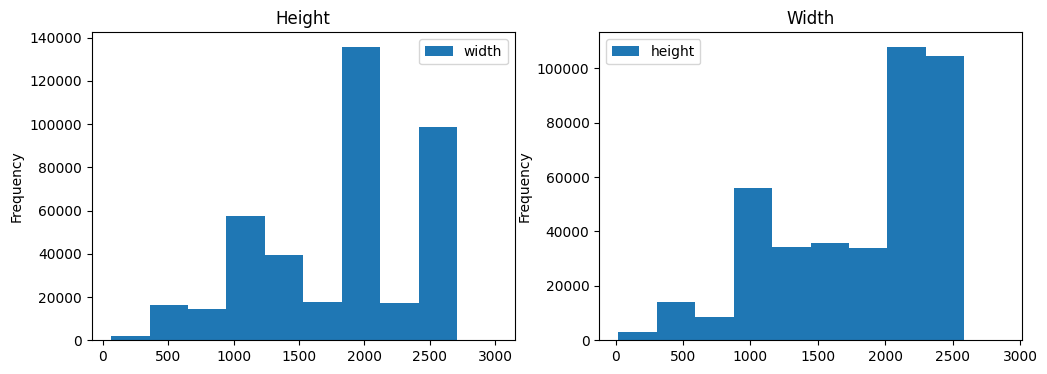

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

images_data.plot(kind='hist', x='height', ax=ax1, title='Height')
images_data.plot(kind='hist', x='width', ax=ax2, title='Width')

Evidently, we have both quite small and large images as well. Since the data is this diverse, we should decide upon a uniform resolution for our images:

1. 2200x1879 (92513 images)
2. 2560x2560 (45005 images)